# SQUAD

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("data/train_V2.csv")

In [14]:
mapings = lambda x: 'solo' if (x == 'solo' or x == 'solo-fpp') else 'duo' if (x == 'duo') or (x == 'duo-fpp') else 'squad' if (x == 'squad') or (x == 'squad-fpp') else 'others'
df['matchType'] = df['matchType'].apply(mapings)
df = df.drop( df[df['matchType'] == 'others'].index )
df = df.drop( df[df['matchType'] == 'solo'].index )
df = df.drop( df[df['matchType'] == 'duo'].index )
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.7,3,0,0.1667
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.7,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.5,1,1497,0.0000


### SQUAD
We only want to select those of 4 players in the game

From the distribution, we see most of the game of match-type *DUO*, have players less than 10.

For our convenience, we want to select those datas of which groups has size 2, and both of them has $winPlacePerc=1$.

In [15]:
squad_df = df
for i in squad_df.columns:
    if i != 'matchId' and i != 'winPlacePerc' and i!= 'matchType' and i != 'Id' and i != 'groupId':
        squad_df[i] =  squad_df.groupby('matchId')[i].rank(pct=True, axis=1)
squad_df.head(20)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.395833,0.317708,0.156250,0.291667,0.411458,0.348958,0.625000,...,0.442708,0.468750,0.505208,0.500000,0.484375,0.505208,0.479167,0.187500,0.156250,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.373626,0.241758,0.439560,0.263736,0.379121,0.269231,0.626374,...,0.439560,0.648352,0.505495,0.978022,0.500000,0.500000,0.560440,0.664835,0.505495,0.6400
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.379121,0.247253,0.296703,0.247253,0.423077,0.247253,0.824176,...,0.417582,0.456044,0.505495,0.494505,0.489011,0.505495,0.230769,0.395604,0.505495,0.1667
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0.426316,0.315789,0.589474,0.636842,0.868421,0.331579,0.463158,...,0.421053,0.457895,0.505263,0.500000,0.505263,0.505263,0.157895,0.163158,0.505263,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0.417526,0.278351,0.134021,0.283505,0.448454,0.288660,0.989691,...,0.453608,0.412371,0.505155,0.432990,0.494845,0.505155,0.030928,0.128866,0.360825,0.0000
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0.396907,0.324742,0.417526,0.298969,0.417526,0.309278,0.659794,...,0.448454,0.458763,0.505155,0.448454,0.489691,0.500000,0.515464,0.654639,0.505155,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0.391753,0.304124,0.371134,0.288660,0.407216,0.309278,0.762887,...,0.432990,0.314433,0.505155,0.458763,0.489691,0.494845,0.154639,0.175258,0.505155,0.2143
10,2b574d43972813,c549efede67ad3,2dd6ddb8320fc1,0.373737,0.237374,0.358586,0.252525,0.444444,0.252525,0.757576,...,0.388889,0.262626,0.500000,0.409091,0.484848,0.500000,0.474747,0.969697,0.505051,0.3929
12,ce4f6ac165705e,da24cdb91969cc,535b5dbd965a94,0.422222,0.233333,0.166667,0.283333,0.388889,0.233333,0.411111,...,0.427778,0.966667,0.505556,0.505556,0.477778,0.494444,0.800000,0.750000,0.505556,0.9286
14,8e244ac61b6aab,d40d0c7d3573a1,94e1c1cc443c65,0.392473,0.698925,0.602151,0.688172,0.430108,0.822581,0.268817,...,0.887097,0.989247,0.505376,0.989247,0.500000,0.505376,0.784946,0.790323,0.849462,0.9000


In [16]:
matches = squad_df.groupby(['matchId', 'groupId'])
matches = matches.filter(lambda x: (len(x.Id) == 4) and (sum(x.winPlacePerc) > 3.8) )

matches.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
28,f9473c4f1cfdc4,8483976f3ba230,6057f846f3ed12,0.394737,0.989474,0.915789,0.836842,0.884211,0.626316,0.063158,...,0.405263,0.421053,0.505263,0.473684,0.505263,0.500000,0.978947,0.736842,0.505263,0.9630
66,43bfa2926267fc,d1e381d0a0e920,e84bdcba8b7865,0.416667,0.979167,0.968750,0.838542,0.901042,0.989583,0.020833,...,0.463542,0.479167,0.505208,0.484375,0.484375,0.500000,1.000000,0.958333,0.505208,0.9630
67,22252be49d4419,37fa7583da2fa2,1ce1cb998f75c7,0.884211,0.952632,0.968421,0.847368,1.000000,0.931579,0.042105,...,0.431579,0.926316,0.505263,0.494737,0.505263,0.989474,0.957895,0.673684,0.505263,1.0000
72,84aa77226db78f,90408966a87241,5b8ab02610ca96,0.397959,0.897959,0.096939,0.229592,0.408163,1.000000,0.500000,...,0.408163,0.484694,0.505102,0.500000,0.989796,0.505102,0.877551,0.938776,0.505102,0.9655
107,7970b4ea89e81e,abf9e2780b9f48,04832cfd74ff30,0.877551,0.612245,0.459184,0.326531,0.438776,0.765306,0.387755,...,0.448980,0.948980,0.505102,0.484694,0.489796,0.505102,0.755102,0.903061,0.505102,1.0000


In [17]:
len(matches.values), len(set(matches.matchId))

(104544, 19450)

Now the matches variable is what we want for selecting only matches restricting groups to be of size 2.

104544


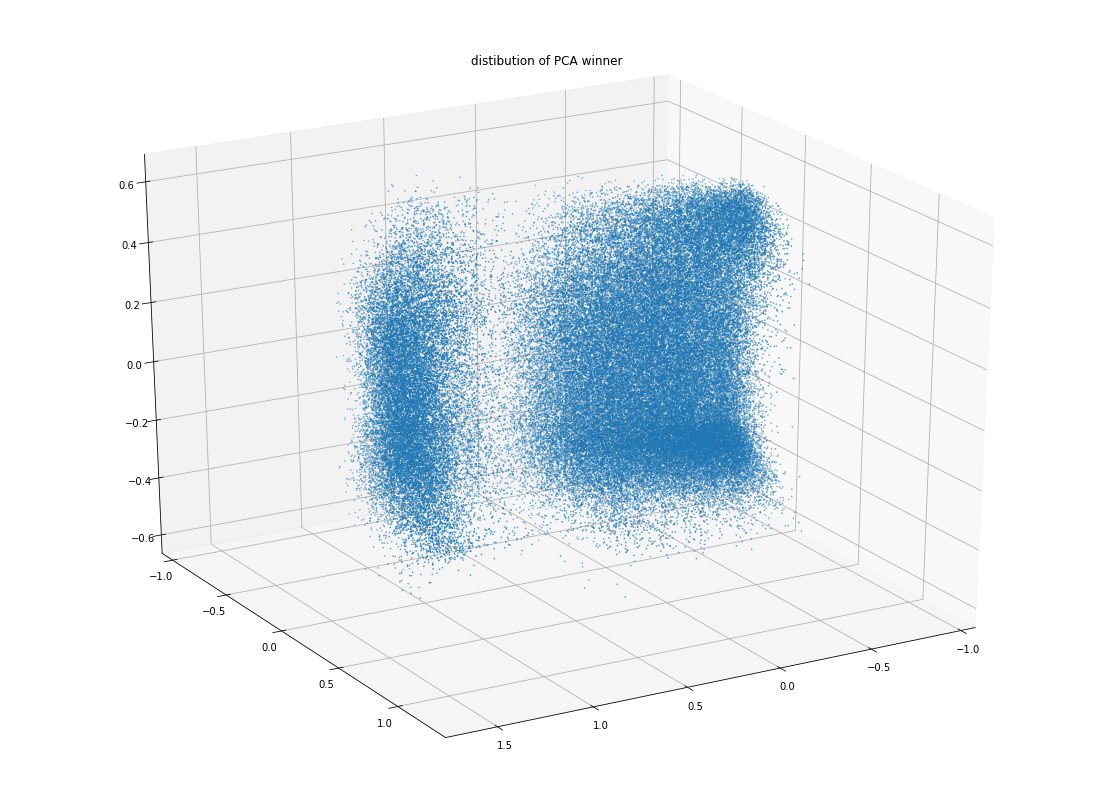

In [23]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)

# matches = matches.drop(['matchId', 'winPlacePerc', 'groupId', 'Id'], axis=1)
# matches = matches.drop(['matchType'], axis = 1)
winner = pca.fit_transform(matches)

x = []
y = []
z = []
fig = plt.figure(figsize=(15,11))
ax = Axes3D(fig)

for i in winner:
    x.append(i[0])
    y.append(i[1])
    z.append(i[2])
print(len(x))
ax.scatter(x,y,z, s=0.4)
ax.view_init(25,60)
plt.title("distibution of PCA winner")
plt.show()

From the above 3d scatter plot, we found out that it kind of indicates that we have two very disticnt type of players in the game. 